# Reinforcement Learning

The types of reinforcement learning models we will look at here are the following

<ul>
    <li>Upper Confidence Bound</li>
    <li>Thompson Sampling</li>
</ul>

The required dataset can be found at <b>datasets/reinforcement_learning.csv</b>

In [12]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6,6)

dataset = pd.read_csv('datasets/reinforcement_learning.csv')
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


#### This dataset contains a list of ads displayed to 10000 unique users. Incase, a user clicked on a given ad, there is a value of 1 recorded against that entry. Our goal here is to identify which of these ads are most likely to have the highest CTR

# Upper Confidence Bound Method

In [37]:
number_of_selections = [0] * len(dataset.columns)
cumm_rewards = [0] * len(dataset.columns)

In [38]:
ads_selected = list()

for i in range(len(dataset)):    
    max_upper_bound = 0
    ad = 0 
    for j in range(len(dataset.columns)):

        if number_of_selections[j] == 0:
            upper_bound = 1e400
        else:
            average_reward = cumm_rewards[j] /  number_of_selections[j]
            delta_i = math.sqrt(3/2*math.log(i+1)/number_of_selections[j])
            upper_bound = average_reward + delta_i
            
        if upper_bound > max_upper_bound:
            ad = j
            max_upper_bound = upper_bound
    
    ads_selected.append(ad)
    number_of_selections[ad] += 1
    cumm_rewards[ad] += int(dataset.iloc[i, ad])
        

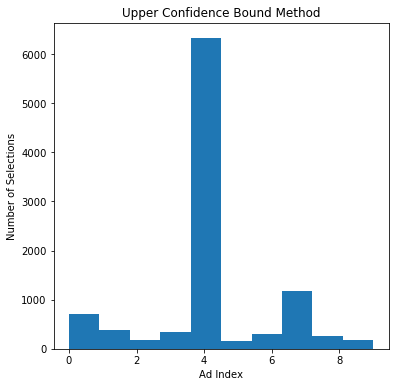

In [45]:
plt.hist(ads_selected)
plt.xlabel('Ad Index')
plt.ylabel('Number of Selections')
plt.title('Upper Confidence Bound Method')

#### The number of selections for ad with index 4 is highest followed by index 7. This means thats Ad5 (index=4) will have the highest CTR